# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import datetime as dt
import re

%matplotlib inline

In [2]:
df=pd.read_csv('train-data.csv') #Import data and display first 5 row 
df.head()

,Sr No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.shape  # Dataset contain 6019 rows and 14 columns

(6019, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr No              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


#####  Mileage, Engine,Power, Seats and New_Price have missing value

##### lets visualize missing values

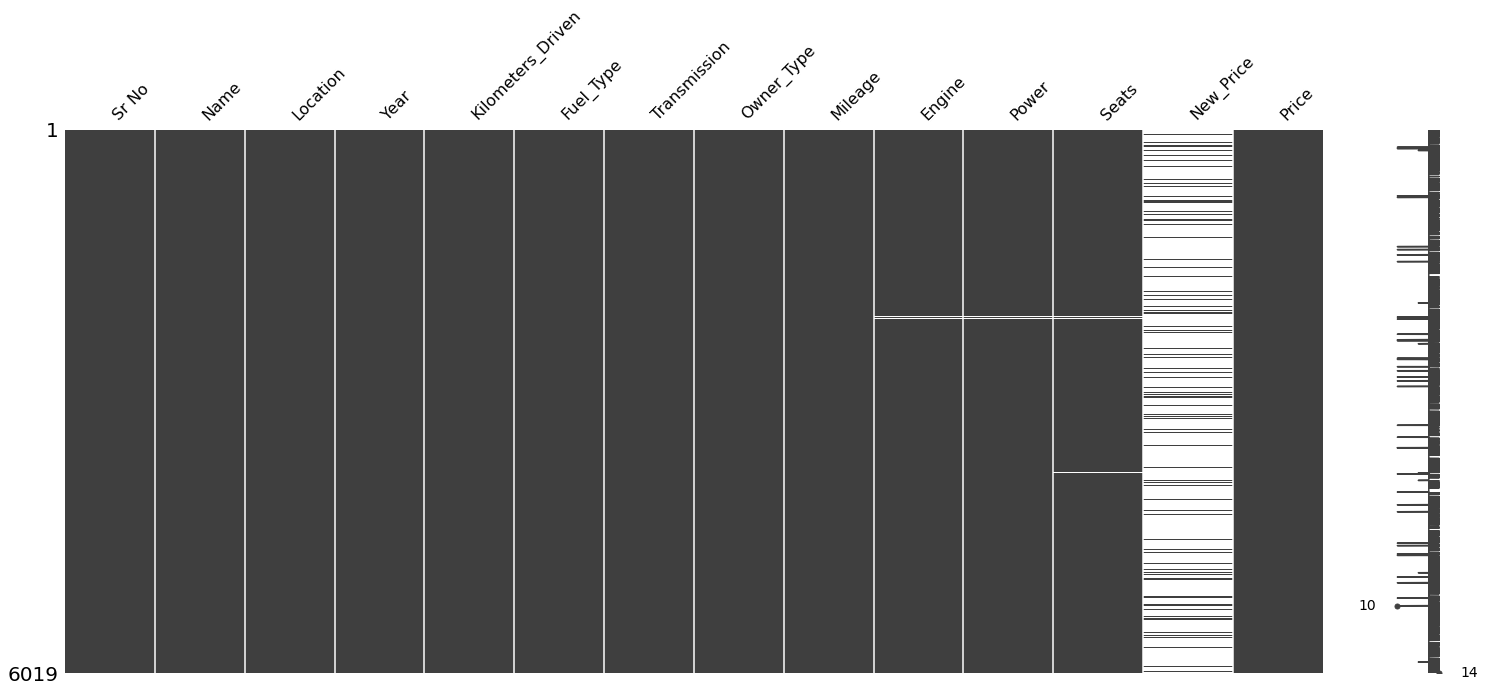

In [5]:
msno.matrix(df) # visulazie missing vale

<div><b>checking % of null value<b><div>

In [6]:
df.isnull().sum()/df.shape[0]*100

Sr No                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

<b>~ 86% of null value present in New_price column, it is advisable to drop New_sheet column<b>

In [7]:
df.describe()

,Sr No,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


 Kilometers_Driven  and price column 75% value and max value has vary large different so it has outlier 

### Lest explore data using univariate analysis and multivariate analysis

## Target value

In [8]:
print(df.Price.describe())

"There is some car value is extermely high compnair to other value as between 75% and Max value has huge different"

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64


'There is some car value is extermely high compnair to other value as between 75% and Max value has huge different'

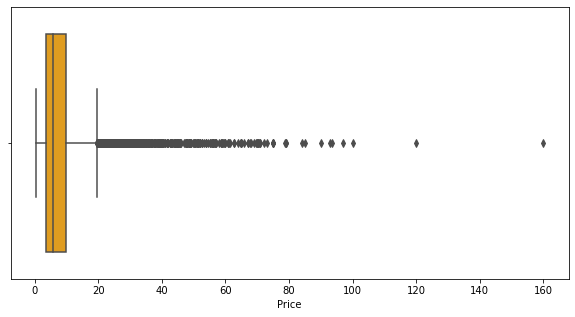

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(df.Price,color="orange")

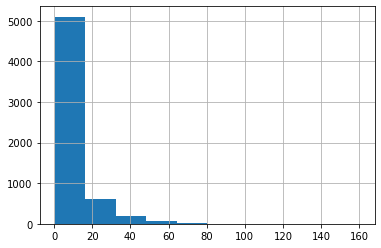

In [10]:
df.Price.hist()

<b>High variance in price is may be because of some branded car has higher price compair to affordable car<b>

Due to higher variance in car price we use <b>median </b> value for univariant analysis

## 1. Sr NO

In [11]:
print(df['Sr No'])

#it is just row number as name suggest show drop this column

0          0
1          1
2          2
3          3
4          4
        ... 
6014    6014
6015    6015
6016    6016
6017    6017
6018    6018
Name: Sr No, Length: 6019, dtype: int64


## 2 Name

In [12]:
df.Name.nunique()

1876

In [13]:
print(df.Name[:20])

print("\n we can observe that every name first word represent the manufacturer name. we create new feature using this information as manufacture name")

0                               Maruti Wagon R LXI CNG
1                     Hyundai Creta 1.6 CRDi SX Option
2                                         Honda Jazz V
3                                    Maruti Ertiga VDI
4                      Audi A4 New 2.0 TDI Multitronic
5                      Hyundai EON LPG Era Plus Option
6                               Nissan Micra Diesel XV
7                    Toyota Innova Crysta 2.8 GX AT 8S
8                  Volkswagen Vento Diesel Comfortline
9                       Tata Indica Vista Quadrajet LS
10                                    Maruti Ciaz Zeta
11                         Honda City 1.5 V AT Sunroof
12                               Maruti Swift VDI BSIV
13                    Land Rover Range Rover 2.2L Pure
14                      Land Rover Freelander 2 TD4 SE
15                         Mitsubishi Pajero Sport 4X4
16                               Honda Amaze S i-Dtech
17                               Maruti Swift DDiS VDI
18        

In [14]:
df.Name=df.Name.apply(lambda x :x.split()[0])

df.Name[:5]

0     Maruti
1    Hyundai
2      Honda
3     Maruti
4       Audi
Name: Name, dtype: object

In [15]:
print(f"No of unique value {df.Name.nunique()}")
print(f"unique value{np.sort(df.Name.unique())}")

#1876 unique value reduce to 31

No of unique value 31
unique value['Ambassador' 'Audi' 'BMW' 'Bentley' 'Chevrolet' 'Datsun' 'Fiat' 'Force'
 'Ford' 'Honda' 'Hyundai' 'ISUZU' 'Isuzu' 'Jaguar' 'Jeep' 'Lamborghini'
 'Land' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mini' 'Mitsubishi' 'Nissan'
 'Porsche' 'Renault' 'Skoda' 'Smart' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


We observe that there is two different name present for <b>ISUZU<b> and <b>Isuzu<b> 

In [16]:
df.Name=df.Name.replace("ISUZU","Isuzu")

np.sort(df.Name.unique())

array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
       'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

Text(0.5, 1.0, 'Brand wise No of car present')

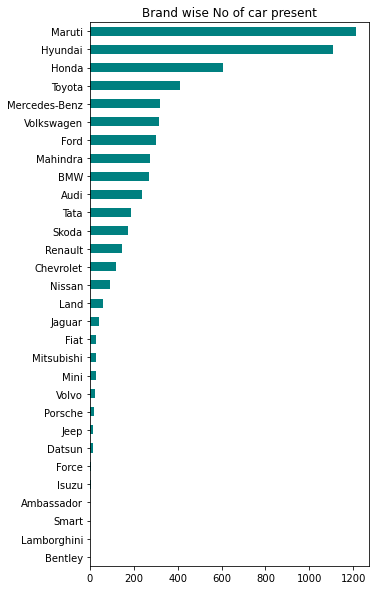

In [17]:
df.Name.value_counts(ascending=True).plot(kind='barh',figsize=(5,10),color="teal")
plt.title("Brand wise No of car present")

<b>Maruti, Hundai, Hona, Toyoto compnay has higher number of present in data and like high brand Lamborghini, jagure, BMW, Audi is lower number of present in dataset<b>

Text(0.5, 1.0, 'Median Price value by Brand Name')

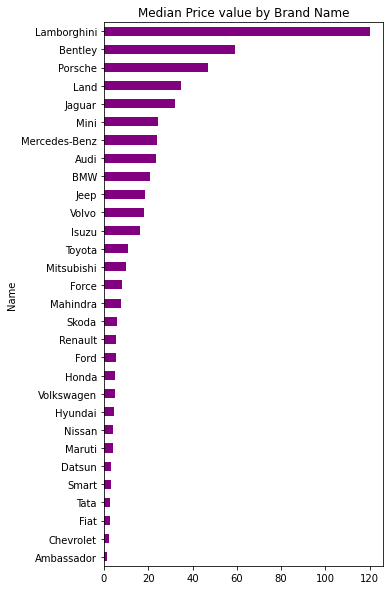

In [18]:
df.groupby(["Name"])["Price"].median().sort_values(ascending=True).plot(kind='barh',figsize=(5,10),color="purple")
plt.title("Median Price value by Brand Name")

<b> Branded car has high salling price and affordable car has low salling price

## 3. Location

In [19]:
df.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

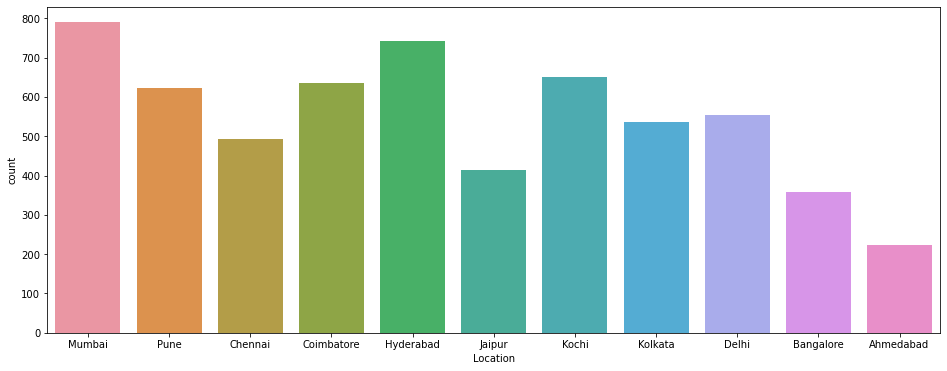

In [20]:
plt.figure(figsize=(16, 6))
sns.countplot(df.Location,)

<b>Most number of car available form data set is Mumbai, Hydrabad and Kochi <b>

Text(0.5, 1.0, 'City wise median car price value')

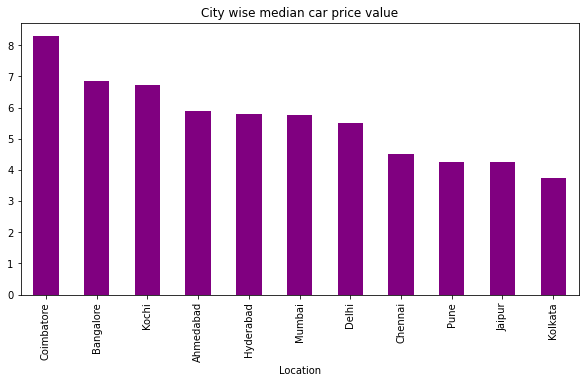

In [21]:
df.groupby("Location")["Price"].median().sort_values(ascending=False).plot(kind='bar',figsize=(10,5),color="purple")
plt.title("City wise median car price value")

<b>Costler car solde in Coimbatore and many city have same median value of card<b>

## 4. Year

In [22]:
print(np.sort(df.Year.unique()))

print("\n Form 1998 to 2019 year of Manufacturer available in dataset")

[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]

 Form 1998 to 2019 year of Manufacturer available in dataset


<b>we create new featuer using year age of the car <b>

In [23]:
df["car_age"]= dt.date.today().year - df.Year

df.car_age[:5]

0    11
1     6
2    10
3     9
4     8
Name: car_age, dtype: int64

In [24]:
print(np.sort(df.car_age.unique()))

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Text(0.5, 1.0, 'Car age wise no of cars')

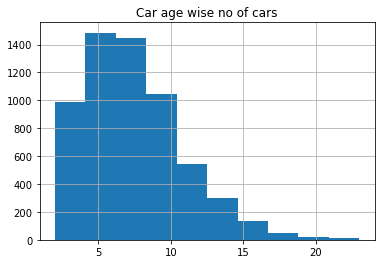

In [25]:
df.car_age.hist()
plt.title("Car age wise no of cars" )

<b> Majority of car age is betwenn 5 to 8 year <b>

Text(0.5, 1.0, 'Car age wise median value')

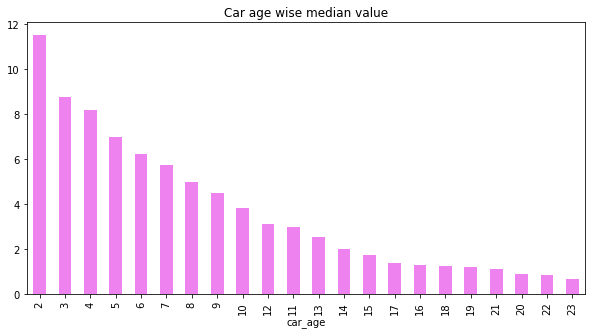

In [26]:
df.groupby("car_age")["Price"].median().sort_values(ascending=False).plot(kind='bar',figsize=(10,5),color="violet")
plt.title("Car age wise median value")

<b> it is obvious that as car age is increase car value is decrease <b> 

## 5. Kilometers_Driven

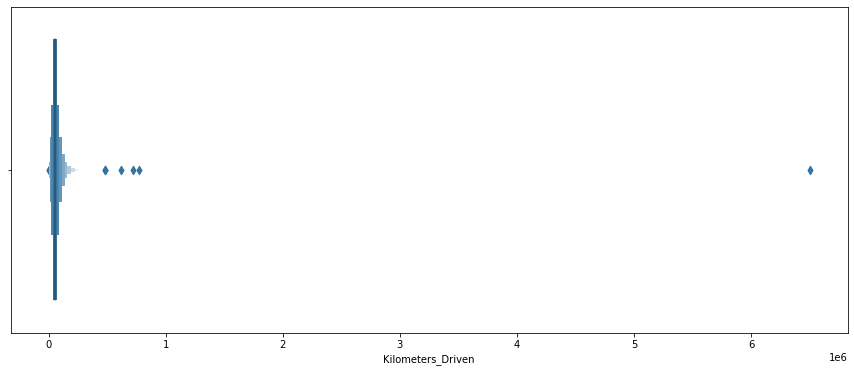

In [27]:
plt.figure(figsize=(15, 6))
sns.boxenplot(df.Kilometers_Driven)

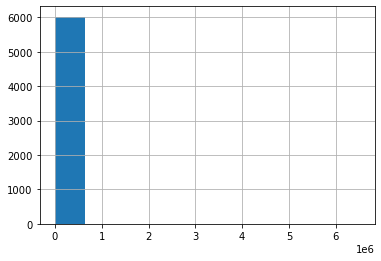

In [28]:
df.Kilometers_Driven.hist()

In [29]:
df.Kilometers_Driven.skew()

58.72466188582937

<b> Because of some car higher kilometer run it show data is extreame right sekw </b>

## 6.Fuel_Type

In [30]:
df.Fuel_Type.unique()

#There is 5 number fule type availabe in car

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [31]:
df.Fuel_Type.value_counts(), df.Fuel_Type.value_counts(normalize=True)*100

(Diesel      3205
 Petrol      2746
 CNG           56
 LPG           10
 Electric       2
 Name: Fuel_Type, dtype: int64,
 Diesel      53.248048
 Petrol      45.622196
 CNG          0.930387
 LPG          0.166141
 Electric     0.033228
 Name: Fuel_Type, dtype: float64)

#### Maximum number of car fule type is petrol and desel

Text(0.5, 1.0, 'Fuel_Type wise median value')

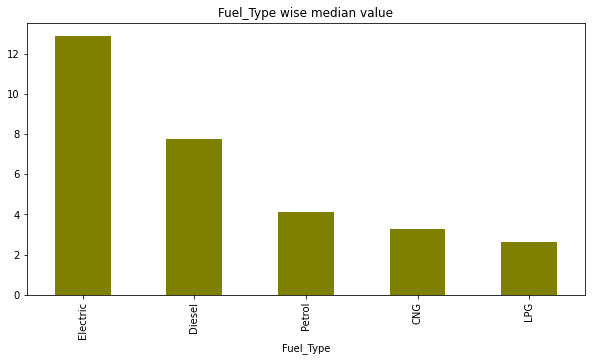

In [32]:
df.groupby("Fuel_Type")["Price"].median().sort_values(ascending=False).plot(kind='bar',figsize=(10,5),color="olive")
plt.title("Fuel_Type wise median value")

<b> Electric car median value is higest it due to new technology and 2nd higest median value of car fuel type is Desel </b>

## 7.Transmission

In [84]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

([<matplotlib.patches.Wedge at 0x1daa9a89700>,
 [Text(-0.6857104709372287, 0.8601169397512435, 'Manual'),
  Text(0.6857103904072654, -0.8601170039520878, 'Automatic')],
 [Text(-0.37402389323848834, 0.4691546944097691, '71%'),
  Text(0.3740238493130539, -0.4691547294284114, '29%')])

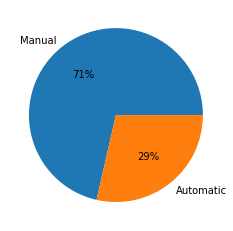

In [88]:
plt.pie(df.Transmission.value_counts(),labels=df.Transmission.value_counts().index,autopct='%.0f%%')

Text(0.5, 1.0, 'Transmission wise median value')

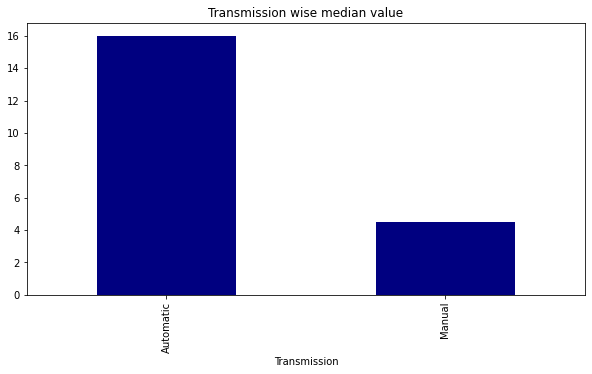

In [92]:
df.groupby("Transmission")["Price"].median().sort_values(ascending=False).plot(kind='bar',figsize=(10,5),color="navy")
plt.title("Transmission wise median value")

<b>71% car is Manual and Automatic car has higher median value<b>

## 8.Owner_Type

In [94]:
df.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

([<matplotlib.patches.Wedge at 0x1daa9c00550>,
 [Text(-0.9267309535095531, 0.5925957642501966, 'First'),
  Text(0.8871432478772125, -0.6503667102073036, 'Second'),
  Text(1.0974296768841592, -0.07515387078474318, 'Third'),
  Text(1.0999878631481763, -0.005167293944506986, 'Fourth & Above')],
 [Text(-0.5054896110052107, 0.3232340532273799, '82%'),
  Text(0.48389631702393404, -0.3547454782948929, '16%'),
  Text(0.5985980055731777, -0.04099302042804173, '2%'),
  Text(0.5999933798990053, -0.0028185239697310835, '0%')])

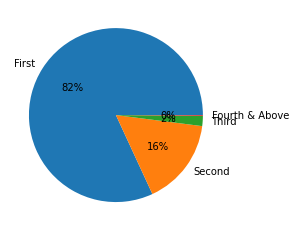

In [95]:
plt.pie(df.Owner_Type.value_counts(),labels=df.Owner_Type.value_counts().index,autopct='%.0f%%')

Text(0.5, 1.0, 'Owner_Type wise median value')

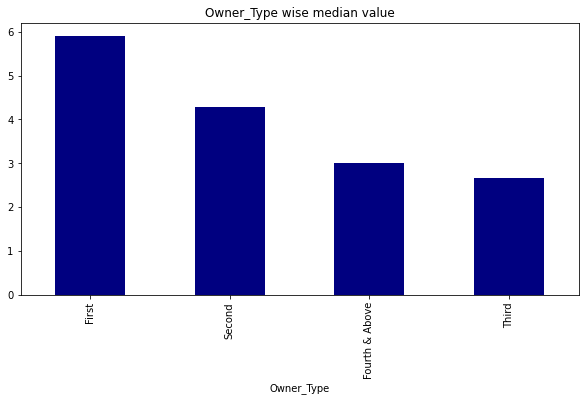

In [97]:
df.groupby("Owner_Type")["Price"].median().sort_values(ascending=False).plot(kind='bar',figsize=(10,5),color="navy")
plt.title("Owner_Type wise median value")

<b>82% car is First owned and car owner increase car price is also decrease </b>

## 9.Mileage

In [33]:
df.Mileage.head()

# Mileage variable combination of value and unit so covert them to two column

print("starting we observe that Mileage column have missing value")

starting we observe that Mileage column have missing value


In [34]:
df.Mileage.isnull().sum()

2

In [35]:
df['Mileage_unit']=[re.findall('[A-z/]+',str(k))[0] for k in df.Mileage]
df['Mileage_value']=df.Mileage.str.extract(r'(\d+.\d+)')

In [36]:
print(f"Before repplace: {df.Mileage_unit.unique()}")

df.Mileage_unit.replace("nan","kmpl",inplace=True)

print(f"After repplace : {df.Mileage_unit.unique()}")

Before repplace: ['km/kg' 'kmpl' 'nan']
After repplace : ['km/kg' 'kmpl']


In [37]:
df.Mileage_unit.value_counts()

print("Majority of car mileage major in kmpl")

Majority of car mileage major in kmpl


In [38]:
np.sort(pd.to_numeric(df.Mileage_value,errors='coerce').unique())

array([ 0.  ,  6.4 ,  7.5 ,  7.81,  7.94,  8.  ,  8.1 ,  8.2 ,  8.3 ,
        8.45,  8.5 ,  8.6 ,  8.7 ,  8.77,  9.  ,  9.1 ,  9.3 ,  9.43,
        9.5 ,  9.52,  9.7 ,  9.74,  9.8 ,  9.9 , 10.  , 10.1 , 10.13,
       10.2 , 10.37, 10.4 , 10.5 , 10.6 , 10.8 , 10.9 , 10.91, 10.93,
       10.98, 11.  , 11.05, 11.07, 11.1 , 11.18, 11.2 , 11.25, 11.3 ,
       11.33, 11.36, 11.4 , 11.49, 11.5 , 11.56, 11.57, 11.62, 11.68,
       11.7 , 11.72, 11.74, 11.78, 11.79, 11.8 , 11.9 , 12.  , 12.05,
       12.07, 12.1 , 12.19, 12.3 , 12.35, 12.37, 12.39, 12.4 , 12.5 ,
       12.51, 12.55, 12.6 , 12.62, 12.63, 12.65, 12.7 , 12.8 , 12.81,
       12.83, 12.85, 12.9 , 12.95, 12.97, 12.98, 12.99, 13.  , 13.01,
       13.06, 13.1 , 13.14, 13.17, 13.2 , 13.22, 13.24, 13.29, 13.33,
       13.4 , 13.44, 13.45, 13.49, 13.5 , 13.53, 13.58, 13.6 , 13.68,
       13.7 , 13.73, 13.8 , 13.9 , 13.93, 14.  , 14.02, 14.07, 14.1 ,
       14.16, 14.2 , 14.21, 14.24, 14.28, 14.3 , 14.33, 14.39, 14.4 ,
       14.42, 14.45,

we observe that some data mileage value is <b>  0 some value is nan </b> and replace both value with <b> median </b> 

In [39]:
med=df.Mileage_value.median()
df.Mileage_value.replace([0.,np.nan],med,inplace=True)

df.Mileage_value=pd.to_numeric(df.Mileage_value)

df.Mileage_value.isna().sum()

0

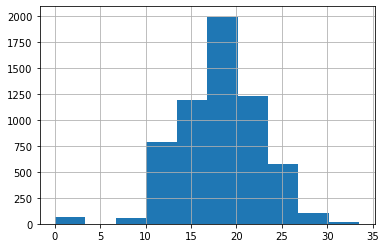

In [40]:
plt.Figure(figsize=(20,5))
df.Mileage_value.hist()

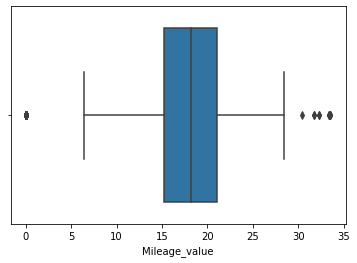

In [41]:
sns.boxplot(df.Mileage_value)

<b> Mileage value is almost normaly distribute </b>

## 10. Engine

In [42]:
print(df.Engine.head())

print(f"\nNo of null value: {df.Engine.isna().sum()}")

0     998 CC
1    1582 CC
2    1199 CC
3    1248 CC
4    1968 CC
Name: Engine, dtype: object

No of null value: 36


In [43]:
#Extract number form string

df.Engine=df.Engine.str.extract(r'(\d+)')
np.sort(pd.to_numeric(df.Engine,errors='coerce').unique())

array([  72.,  624.,  793.,  796.,  799.,  814.,  936.,  970.,  993.,
        995.,  998.,  999., 1047., 1061., 1086., 1120., 1150., 1172.,
       1186., 1193., 1194., 1196., 1197., 1198., 1199., 1242., 1248.,
       1298., 1299., 1341., 1343., 1364., 1368., 1373., 1388., 1390.,
       1395., 1396., 1399., 1405., 1422., 1461., 1462., 1468., 1489.,
       1493., 1495., 1496., 1497., 1498., 1499., 1582., 1586., 1590.,
       1591., 1595., 1596., 1597., 1598., 1599., 1781., 1794., 1796.,
       1797., 1798., 1799., 1896., 1948., 1950., 1956., 1968., 1969.,
       1978., 1984., 1985., 1991., 1995., 1997., 1998., 1999., 2092.,
       2112., 2143., 2147., 2148., 2149., 2179., 2198., 2199., 2200.,
       2349., 2354., 2359., 2360., 2362., 2393., 2400., 2446., 2477.,
       2487., 2489., 2494., 2495., 2496., 2497., 2498., 2499., 2523.,
       2609., 2694., 2696., 2698., 2706., 2720., 2755., 2771., 2773.,
       2835., 2894., 2925., 2953., 2956., 2967., 2979., 2982., 2987.,
       2993., 2995.,

In [44]:
df.Engine=(pd.to_numeric(df.Engine,errors='coerce'))


In [45]:
print(f"No of null value: {df.Engine.isna().sum()}")

df.Engine.fillna(df.Engine.median(),inplace=True)

print(f"After fill NA No of null value: {df.Engine.isna().sum()}")

No of null value: 36
After fill NA No of null value: 0


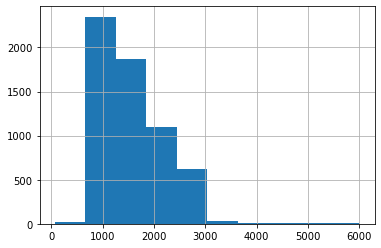

In [46]:
df.Engine.hist()

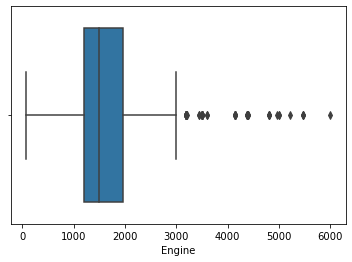

In [47]:
sns.boxplot(df.Engine)

<b> Engine data is right sekw may be because of some sport car or branded car have havey engine </d>

## 11.Power

In [48]:
print(df.Power.head())

print(f"\nNo of null value: {df.Power.isna().sum()}")

0    58.16 bhp
1    126.2 bhp
2     88.7 bhp
3    88.76 bhp
4    140.8 bhp
Name: Power, dtype: object

No of null value: 36


In [49]:
#Extract number form string

df.Power=df.Power.str.extract(r'(\d+)')
np.sort(pd.to_numeric(df.Power,errors='coerce').unique())

array([ 34.,  35.,  37.,  38.,  40.,  41.,  46.,  47.,  48.,  52.,  53.,
        55.,  56.,  57.,  58.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  97.,  98.,  99., 100., 101.,
       102., 103., 104., 105., 106., 107., 108., 110., 112., 113., 114.,
       115., 116., 117., 118., 120., 121., 122., 123., 125., 126., 127.,
       130., 132., 134., 135., 136., 138., 139., 140., 141., 142., 143.,
       144., 147., 148., 149., 150., 152., 153., 154., 155., 156., 157.,
       158., 160., 161., 162., 163., 164., 165., 167., 168., 169., 170.,
       171., 174., 175., 177., 178., 179., 180., 181., 183., 184., 185.,
       186., 187., 189., 190., 191., 192., 193., 194., 197., 198., 199.,
       200., 201., 203., 204., 207., 208., 210., 215., 218., 224., 226.,
       227., 231., 235., 236., 237., 240., 241., 24

In [50]:
df.Power=(pd.to_numeric(df.Power,errors='coerce'))

print(f"No of null value: {df.Power.isna().sum()}")

df.Power.fillna(df.Power.median(),inplace=True)

print(f"After fill NA No of null value: {df.Power.isna().sum()}")

No of null value: 143
After fill NA No of null value: 0


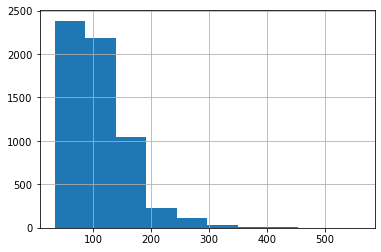

In [51]:
df.Power.hist()

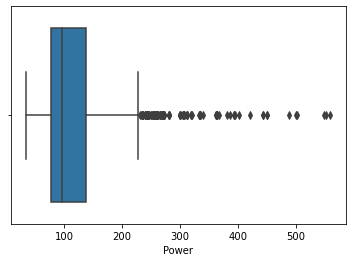

In [52]:
sns.boxplot(df.Power)

<b> Same like Engine Power data is right sekw may be because of some sport car or branded car have havey engine </d>

## 12. Seats

In [53]:
df.Seats.unique()

# No of seats range is from 2 to 10

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [56]:
seat_mod=df.Seats.mode()
df.Seats.replace(0,np.nan,inplace=True)
df.Seats.fillna(5,inplace=True)

In [60]:
df.Seats.value_counts()

5.0     5057
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: Seats, dtype: int64

<b>Majority car are  5 seater or Suvs </b>

Text(0.5, 1.0, 'Seatse wise median value')

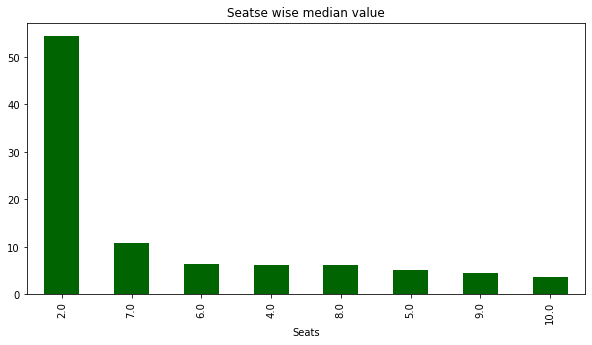

In [64]:
df.groupby("Seats")["Price"].median().sort_values(ascending=False).plot(kind='bar',figsize=(10,5),color="darkgreen")
plt.title("Seatse wise median value")

<b> 2 seater car have higher meadium value may be thery are sport car </b>

## 13. New_Price

In [67]:
df.New_Price.isna().sum()/len(df)

0.8631001827546104

<b>New price column has 86% null value so better to remove this column </b>

In [71]:
#Remove unwanted column from dataframe

df.drop(["Sr No","Year","Mileage","New_Price"],axis=1,inplace=True)
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,car_age,Mileage_unit,Mileage_value
0,Maruti,Mumbai,72000,CNG,Manual,First,998.0,58.0,5.0,1.75,11,km/kg,26.60
1,Hyundai,Pune,41000,Diesel,Manual,First,1582.0,126.0,5.0,12.50,6,kmpl,19.67
2,Honda,Chennai,46000,Petrol,Manual,First,1199.0,88.0,5.0,4.50,10,kmpl,18.20
3,Maruti,Chennai,87000,Diesel,Manual,First,1248.0,88.0,7.0,6.00,9,kmpl,20.77
4,Audi,Coimbatore,40670,Diesel,Automatic,Second,1968.0,140.0,5.0,17.74,8,kmpl,15.20


In [72]:
df.info() # no null value now present in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Engine             6019 non-null   float64
 7   Power              6019 non-null   float64
 8   Seats              6019 non-null   float64
 9   Price              6019 non-null   float64
 10  car_age            6019 non-null   int64  
 11  Mileage_unit       6019 non-null   object 
 12  Mileage_value      6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


<b>multivariate Analysis</b>

In [74]:
df.corr()

,Kilometers_Driven,Engine,Power,Seats,Price,car_age,Mileage_value
Kilometers_Driven,1.000000,0.090890,0.032330,0.083828,-0.011493,0.173048,-0.065253
Engine,0.090890,1.000000,0.860642,0.397490,0.657347,0.050086,-0.586404
Power,0.032330,0.860642,1.000000,0.102948,0.769664,-0.023523,-0.497820
Seats,0.083828,0.397490,0.102948,1.000000,0.053787,-0.014829,-0.302424
Price,-0.011493,0.657347,0.769664,0.053787,1.000000,-0.305327,-0.306588
car_age,0.173048,0.050086,-0.023523,-0.014829,-0.305327,1.000000,-0.321534
Mileage_value,-0.065253,-0.586404,-0.497820,-0.302424,-0.306588,-0.321534,1.000000


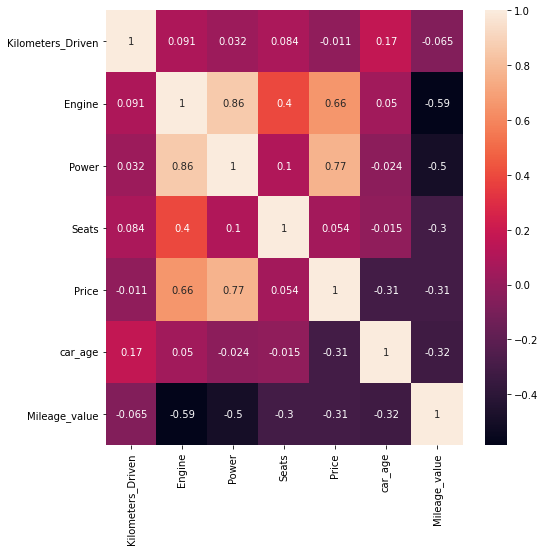

In [80]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

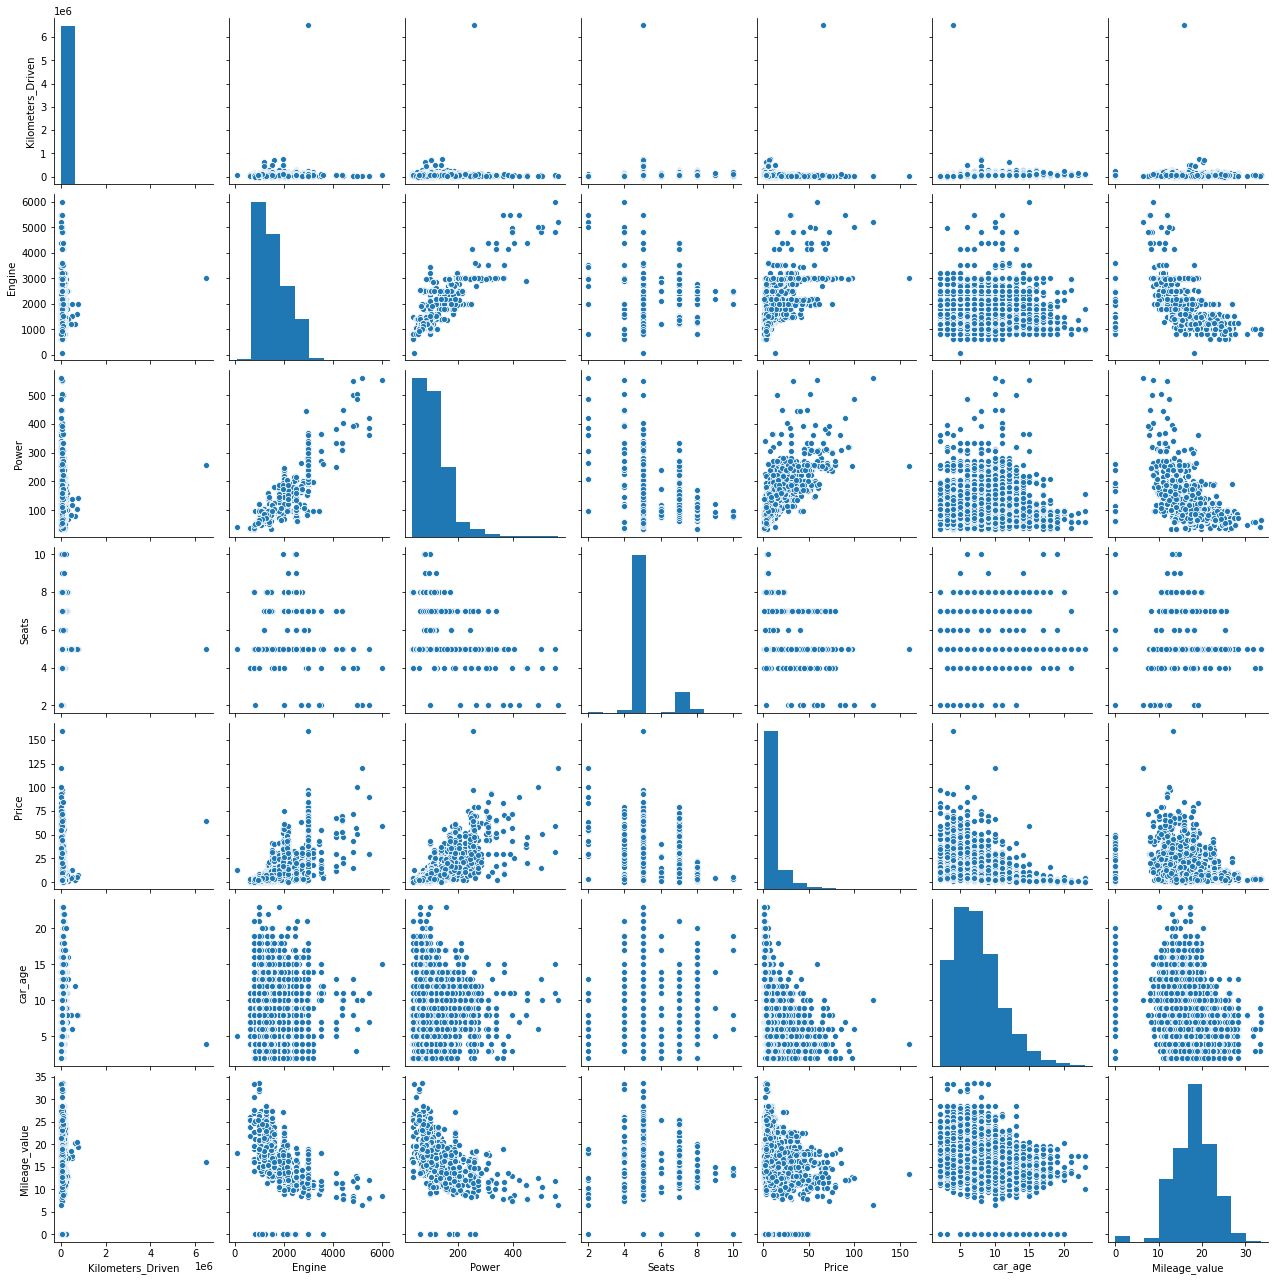

In [81]:
sns.pairplot(df)

 1. Engine, power, Mileage_value is higheely correlated it may be create collinearity issue
 2. kilometers_Driven very is less correlated with price 
 3. Power is highly correlated with price

## Final Conclusion

1. Sr. No.  is normal sequence of number and New_Price has 86% of NAN value so both column can be drop
2. From Name column we extract Brand name and it is show relateship with price
3. As Car age is increase car price is decrease
4. Kilometr_Driven show weak relationship with traget variable and extreme oullier present so we can remove this also
5. Power and engine are highely correlated to each other show we can remove any one variable
6. Power is highly correlated with Price
7. High brand value meadian value is higher than other cars and also very less number of present in data set
8. Automated car price is higher than manual car
9. As car ower increase car price is decrease

<b>Feature engineering and transformation technique</b>

1. Car Brand name has 31 unique record so use frequency encoding also high value car count is low
2. City name we use traget encoding tecnique as some of the city has same medinum price of car
3. Fule type, Transmission and Mileage_unit use onhot encoding
4. Owen type we use odinal encoding
5. Many features and even traget value are highly sekwed hense we can not use liner mode here  